## Данный ноутбук обрабатывает текст сообщений: удаляет стоп слова, проводит лемматизацию и стемминг

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.corpus import brown
import re
from tqdm import tqdm_notebook as tqdm
from nltk.stem import SnowballStemmer

In [2]:
#удалить перепосты
# в режексе заменять на пробел
# удалить слова с леном 1
df = pd.read_csv('/is/texts/mag/kom_rbc_join_tic_flag_tot.csv', sep='|')
df.head()

,text,date,lower_text,ticker,total_msg
0,Московский «Спартак» со счетом 2:1 обыграл сто...,20210313.0,московский «спартак» со счетом 2:1 обыграл сто...,vtbr,1833
1,Схема самой крупной программы борьбы с бедност...,20210311.0,схема самой крупной программы борьбы с бедност...,sber,3634
2,Следственный комитет России (СКР) начал провер...,20140108.0,следственный комитет россии (скр) начал провер...,aflt,1032
3,Владелец РАТМа Эдуард Таран продал основной це...,20140108.0,владелец ратма эдуард таран продал основной це...,sber,3634
4,«Газпром» в прошлом году увеличил экспорт на 7...,20140108.0,«газпром» в прошлом году увеличил экспорт на 7...,gazp,2768


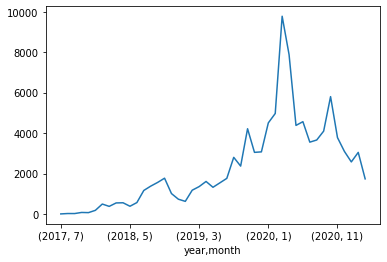

In [6]:
df.groupby(['year', 'month']).count().message.plot()

In [7]:
df.groupby(['src', 'year']).count().message

src  year
25   2017      277
     2018     2011
     2019     4015
     2020     3972
     2021      339
26   2020    14499
     2021      673
27   2017       91
     2018     8510
     2019    17432
     2020    26071
     2021     1919
28   2020     3060
     2021     4163
48   2019     3438
     2020    12456
     2021      262
Name: message, dtype: int64

### Очистка

In [3]:
# Удаляем перенос строки
df = df.replace('\n',' ', regex=True)
df.head()

,text,date,lower_text,ticker,total_msg
0,Московский «Спартак» со счетом 2:1 обыграл сто...,20210313.0,московский «спартак» со счетом 2:1 обыграл сто...,vtbr,1833
1,Схема самой крупной программы борьбы с бедност...,20210311.0,схема самой крупной программы борьбы с бедност...,sber,3634
2,Следственный комитет России (СКР) начал провер...,20140108.0,следственный комитет россии (скр) начал провер...,aflt,1032
3,Владелец РАТМа Эдуард Таран продал основной це...,20140108.0,владелец ратма эдуард таран продал основной це...,sber,3634
4,«Газпром» в прошлом году увеличил экспорт на 7...,20140108.0,«газпром» в прошлом году увеличил экспорт на 7...,gazp,2768


In [4]:
f = df


### Замена ё/е и удаление всего кроме русских букв и пробелов

In [5]:
f.text = f.text.astype(str)
f['text'] = f['text'].str.replace('ё', 'е')
f.to_csv('/is/texts/mag/mag_text_lower_tic_all_flag_all_dt_e.csv', sep='|', index=False)
f.head()    

,text,date,lower_text,ticker,total_msg
0,Московский «Спартак» со счетом 2:1 обыграл сто...,20210313.0,московский «спартак» со счетом 2:1 обыграл сто...,vtbr,1833
1,Схема самой крупной программы борьбы с бедност...,20210311.0,схема самой крупной программы борьбы с бедност...,sber,3634
2,Следственный комитет России (СКР) начал провер...,20140108.0,следственный комитет россии (скр) начал провер...,aflt,1032
3,Владелец РАТМа Эдуард Таран продал основной це...,20140108.0,владелец ратма эдуард таран продал основной це...,sber,3634
4,«Газпром» в прошлом году увеличил экспорт на 7...,20140108.0,«газпром» в прошлом году увеличил экспорт на 7...,gazp,2768


In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw to /root/nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [7]:
def clear_text(x):
    return re.sub(' +',u' ', re.sub(u'[^а-я ]',u'', x.lower()))
f['text'] = f['text'].astype(str)
f['text_reg'] = f['text'].apply(clear_text)
f.head()

,text,date,lower_text,ticker,total_msg,text_reg
0,Московский «Спартак» со счетом 2:1 обыграл сто...,20210313.0,московский «спартак» со счетом 2:1 обыграл сто...,vtbr,1833,московский спартак со счетом обыграл столичное...
1,Схема самой крупной программы борьбы с бедност...,20210311.0,схема самой крупной программы борьбы с бедност...,sber,3634,схема самой крупной программы борьбы с бедност...
2,Следственный комитет России (СКР) начал провер...,20140108.0,следственный комитет россии (скр) начал провер...,aflt,1032,следственный комитет россии скр начал проверку...
3,Владелец РАТМа Эдуард Таран продал основной це...,20140108.0,владелец ратма эдуард таран продал основной це...,sber,3634,владелец ратма эдуард таран продал основной це...
4,«Газпром» в прошлом году увеличил экспорт на 7...,20140108.0,«газпром» в прошлом году увеличил экспорт на 7...,gazp,2768,газпром в прошлом году увеличил экспорт на в ч...


In [8]:
print(f.shape)
f = f[f.text_reg != '']
f.to_csv('/is/texts/mag/text_lower_tic_all_flag_all_dt_e_reg.csv', sep='|', index=False)
print(f.shape)
f.head()

(20702, 6)
(20702, 6)


,text,date,lower_text,ticker,total_msg,text_reg
0,Московский «Спартак» со счетом 2:1 обыграл сто...,20210313.0,московский «спартак» со счетом 2:1 обыграл сто...,vtbr,1833,московский спартак со счетом обыграл столичное...
1,Схема самой крупной программы борьбы с бедност...,20210311.0,схема самой крупной программы борьбы с бедност...,sber,3634,схема самой крупной программы борьбы с бедност...
2,Следственный комитет России (СКР) начал провер...,20140108.0,следственный комитет россии (скр) начал провер...,aflt,1032,следственный комитет россии скр начал проверку...
3,Владелец РАТМа Эдуард Таран продал основной це...,20140108.0,владелец ратма эдуард таран продал основной це...,sber,3634,владелец ратма эдуард таран продал основной це...
4,«Газпром» в прошлом году увеличил экспорт на 7...,20140108.0,«газпром» в прошлом году увеличил экспорт на 7...,gazp,2768,газпром в прошлом году увеличил экспорт на в ч...


In [9]:
print(f.shape)
f.drop_duplicates(['ticker', 'text_reg'], inplace=True)
print(f.shape)
f.drop_duplicates(['text_reg'], keep=False, inplace=True)
print(f.shape)

(20702, 6)
(20701, 6)
(20701, 6)


### Токенизация text_reg_spell

In [3]:
f = pd.read_csv('/is/texts/mag/mag_text_lower_tic_all_flag_all_dt_e_reg_stop_short.csv', sep='|')
f.head()

,date,ticker,total_msg,text_reg_stop
0,20210313.0,vtbr,1833.0,спартак счетом обыграл столичное динамо матче ...
1,20210311.0,sber,3634.0,схема крупной программы борьбы бедностью рф по...
2,20140108.0,aflt,1032.0,следственный комитет россии скр начал проверку...
3,20140108.0,sber,3634.0,владелец ратма таран продал основной цементный...
4,20140108.0,gazp,2768.0,прошлом году увеличил экспорт частности европу...


In [4]:
print(f.shape)
f.drop_duplicates('text_reg_stop', inplace=True)
print(f.shape)

(20767, 4)
(17627, 4)


In [11]:
f = f[f.text_reg_stop.isna()==False]

In [12]:
tokens = []
l = f['text_reg_stop'].tolist()
print(len(l))
for i in tqdm(range(len(l)), position=0, leave=True):
    tokens.append(nltk.word_tokenize(l[i]))
print(len(tokens))

17626


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



17626


In [13]:
with open('/is/pkl/mag_tokens.pkl', 'wb') as tn:
    pickle.dump(tokens, tn)

### Добавляем стоп слова

In [ ]:
stop_words = nltk.corpus.stopwords.words('russian')

In [14]:
with open('/is/pkl/stop_words_mfd.pkl', 'rb') as sw:
    stop_words = pickle.load(sw)
len(stop_words)

2436

### Удаляем

In [36]:
with open('/is/pkl/mag_tokens_spell.pkl', 'rb') as tn:
    tokens = pickle.load(tn)
len(tokens)

100115

In [14]:
def delete_stop_words(x):
    return [word for word in x if word not in stop_words]

print(len(tokens))
tokens_nostopwords = []

for i in tqdm(range(len(tokens)), position=0, leave=True):
    tokens_nostopwords = tokens_nostopwords + [delete_stop_words(tokens[i])]
print(len(tokens))
print(len(tokens_nostopwords))
#with open('/is/pkl/mag_tokens_nostopwords.pkl', 'wb') as tnsw:
    #pickle.dump(tokens_nostopwords, tnsw)

20701


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



20701
20701


MemoryError: 

In [15]:
s = []
for i in tqdm(range(len(tokens_nostopwords)), position=0, leave=True):
    s = s + [' '.join(tokens_nostopwords[i])]
f['text_reg_stop'] = s
f.to_csv('/is/texts/mag/mag_text_lower_tic_all_flag_all_dt_e_reg_stop.csv', sep='|', index=False)
f.head()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,text,date,lower_text,ticker,total_msg,text_reg,text_reg_stop
0,Московский «Спартак» со счетом 2:1 обыграл сто...,20210313.0,московский «спартак» со счетом 2:1 обыграл сто...,vtbr,1833,московский спартак со счетом обыграл столичное...,спартак счетом обыграл столичное динамо матче ...
1,Схема самой крупной программы борьбы с бедност...,20210311.0,схема самой крупной программы борьбы с бедност...,sber,3634,схема самой крупной программы борьбы с бедност...,схема крупной программы борьбы бедностью рф по...
2,Следственный комитет России (СКР) начал провер...,20140108.0,следственный комитет россии (скр) начал провер...,aflt,1032,следственный комитет россии скр начал проверку...,следственный комитет россии скр начал проверку...
3,Владелец РАТМа Эдуард Таран продал основной це...,20140108.0,владелец ратма эдуард таран продал основной це...,sber,3634,владелец ратма эдуард таран продал основной це...,владелец ратма таран продал основной цементный...
4,«Газпром» в прошлом году увеличил экспорт на 7...,20140108.0,«газпром» в прошлом году увеличил экспорт на 7...,gazp,2768,газпром в прошлом году увеличил экспорт на в ч...,прошлом году увеличил экспорт частности европу...


In [28]:
col = p1.columns

In [33]:
p1 = pd.read_csv('/is/texts/mag/mag_text_lower_tic_all_flag_all_dt_e_reg_stop.csv', sep='|', skiprows=15000, nrows=6000)
p1.shape

(5767, 7)

In [34]:
p1.columns = col

In [35]:
f = f.append(p1[['date', 'ticker', 'total_msg', 'text_reg_stop']])
f.shape

(20767, 4)

In [37]:
p1 = 0

In [36]:
f.to_csv('/is/texts/mag/mag_text_lower_tic_all_flag_all_dt_e_reg_stop_short.csv', sep='|', index=False)

In [16]:
tokens_nostopwords = tokens

### Стемминг

In [17]:
stemmer = SnowballStemmer('russian')
tokens_st = []
print(len(tokens_nostopwords))
for i in tqdm(range(len(tokens_nostopwords)), position=0, leave=True):
    stem = [stemmer.stem(w) for w in tokens_nostopwords[i]]
    tokens_st = tokens_st + [stem]
print(len(tokens_st))

17626


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.



17626


In [22]:
s = []
for i in tqdm(range(len(tokens_st)), position=0, leave=True):
    s = s + [' '.join(tokens_st[i])]
f['text_reg_stop_stem'] = s
f.to_csv('/is/texts/mag/mag_text_lower_tic_all_flag_all_dt_e_reg_stop_stem.csv', sep='|', index=False)
f.head()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


,date,ticker,total_msg,text_reg_stop,text_reg_stop_stem
0,20210313.0,vtbr,1833.0,спартак счетом обыграл столичное динамо матче ...,спартак счет обыгра столичн динам матч го тур ...
1,20210311.0,sber,3634.0,схема крупной программы борьбы бедностью рф по...,схем крупн программ борьб бедност рф поддержк ...
2,20140108.0,aflt,1032.0,следственный комитет россии скр начал проверку...,следствен комитет росс скр нача проверк эвитер...
3,20140108.0,sber,3634.0,владелец ратма таран продал основной цементный...,владелец ратм тара прода основн цементн акт гр...
4,20140108.0,gazp,2768.0,прошлом году увеличил экспорт частности европу...,прошл год увелич экспорт частност европ сократ...


In [ ]:
with open('/is/pkl/mag_tokens_stem.pkl', 'wb') as ts:
    pickle.dump(tokens_st, ts)

In [46]:
with open('/is/pkl/mag_tokens_stem.pkl', 'rb') as ts:
    tok = pickle.load(ts)

In [74]:
f = pd.read_csv('/is/texts/tg/text_lower_tic_all_flag_all_dt_e_reg_spell_stop_lem_stem.csv', sep='|')
f.shape

(100115, 15)

#### Анализ длины сообщений

In [25]:
f['len_lem_text'] = f.text_reg_stop_stem.str.len()
f.describe()

,date,total_msg,len_lem_text
count,1.762600e+04,17626.000000,17626.000000
mean,2.016736e+07,1419.449223,2978.313060
std,1.931111e+04,1283.286565,2084.969175
min,2.014011e+07,121.000000,21.000000
25%,2.015062e+07,351.000000,1921.000000
50%,2.017012e+07,720.000000,2532.000000
75%,2.018093e+07,2768.000000,3340.000000
max,2.021031e+07,3634.000000,41368.000000


In [26]:
f.head()

,date,ticker,total_msg,text_reg_stop,text_reg_stop_stem,len_lem_text
0,20210313.0,vtbr,1833.0,спартак счетом обыграл столичное динамо матче ...,спартак счет обыгра столичн динам матч го тур ...,320
1,20210311.0,sber,3634.0,схема крупной программы борьбы бедностью рф по...,схем крупн программ борьб бедност рф поддержк ...,4041
2,20140108.0,aflt,1032.0,следственный комитет россии скр начал проверку...,следствен комитет росс скр нача проверк эвитер...,2642
3,20140108.0,sber,3634.0,владелец ратма таран продал основной цементный...,владелец ратм тара прода основн цементн акт гр...,2387
4,20140108.0,gazp,2768.0,прошлом году увеличил экспорт частности европу...,прошл год увелич экспорт частност европ сократ...,1630


#### Удаляем сообщения длиной 0 и 1

In [27]:
print(f.shape)
f = f[(f.len_lem_text!=0)&(f.len_lem_text!=1)]
print(f.shape)

(17626, 6)
(17626, 6)


#### Удаляем сообщения аутлаеры по длине

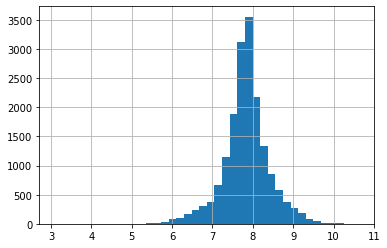

In [28]:
import numpy as np
np.log(f.len_lem_text + 1).hist(bins=40)

#### Сравниваем iqr по логарифму и в обычном виде

In [30]:
f.shape

(17626, 6)

In [29]:
iqr = (f['len_lem_text'].quantile(0.75) - f['len_lem_text'].quantile(0.25)) * 1.5
f[(f.len_lem_text > f.len_lem_text.quantile(0.25) - iqr)&(f.len_lem_text < f.len_lem_text.quantile(0.75) + iqr)].shape

(16230, 6)

In [31]:
iqr_np = (np.log(f['len_lem_text']).quantile(0.75) - np.log(f['len_lem_text']).quantile(0.25)) * 1.5
f[(np.log(f.len_lem_text) > np.log(f.len_lem_text).quantile(0.25) - iqr_np) & \
  (np.log(f.len_lem_text) < np.log(f.len_lem_text.quantile(0.75)) + iqr_np)].shape

(16280, 6)

In [32]:
f = f[(np.log(f.len_lem_text) > np.log(f.len_lem_text).quantile(0.25) - iqr_np) & \
  (np.log(f.len_lem_text) < np.log(f.len_lem_text.quantile(0.75)) + iqr_np)]
f.shape

(16280, 6)

In [33]:
f.head()

,date,ticker,total_msg,text_reg_stop,text_reg_stop_stem,len_lem_text
1,20210311.0,sber,3634.0,схема крупной программы борьбы бедностью рф по...,схем крупн программ борьб бедност рф поддержк ...,4041
2,20140108.0,aflt,1032.0,следственный комитет россии скр начал проверку...,следствен комитет росс скр нача проверк эвитер...,2642
3,20140108.0,sber,3634.0,владелец ратма таран продал основной цементный...,владелец ратм тара прода основн цементн акт гр...,2387
4,20140108.0,gazp,2768.0,прошлом году увеличил экспорт частности европу...,прошл год увелич экспорт частност европ сократ...,1630
5,20140109.0,zill,150.0,председатель совета директоров независимой неф...,председател совет директор независим нефтян ко...,961


In [34]:
f['total_msg'] = f.groupby(['ticker'])['ticker'].transform('count')
f.head()

,date,ticker,total_msg,text_reg_stop,text_reg_stop_stem,len_lem_text
1,20210311.0,sber,2548,схема крупной программы борьбы бедностью рф по...,схем крупн программ борьб бедност рф поддержк ...,4041
2,20140108.0,aflt,916,следственный комитет россии скр начал проверку...,следствен комитет росс скр нача проверк эвитер...,2642
3,20140108.0,sber,2548,владелец ратма таран продал основной цементный...,владелец ратм тара прода основн цементн акт гр...,2387
4,20140108.0,gazp,2391,прошлом году увеличил экспорт частности европу...,прошл год увелич экспорт частност европ сократ...,1630
5,20140109.0,zill,90,председатель совета директоров независимой неф...,председател совет директор независим нефтян ко...,961


In [35]:
print(len(f[f.total_msg > 200].ticker.unique()))
print(len(f[f.total_msg > 100].ticker.unique()))

21
37


In [40]:
f[f.total_msg < 90].ticker.unique()

array(['tcsg', 'cbom'], dtype=object)

In [41]:
f.to_csv('/is/texts/mag/mag_text_lower_tic_all_flag_all_dt_e_reg_stop_stem_len.csv', sep='|', index=False)